In [1]:
import cv2
import tensorflow as tf

from tensorflow.keras.applications.mobilenet import MobileNet
from keras.layers import GlobalAveragePooling2D, Dense, Dropout
from keras.models import Model

import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
import keras
from keras.callbacks import ModelCheckpoint, TensorBoard  # Thêm TensorBoard vào danh sách import
from datetime import datetime  # Import để lấy ngày và giờ hiện tại
import matplotlib.pyplot as plt  # Thêm thư viện để vẽ biểu đồ

n_class = 5

def get_model():
    base_model = tf.keras.applications.mobilenet_v2.MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

    x = base_model.output

    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu')(x)
    x = Dropout(0.25)(x)
    x = Dense(1024, activation='relu')(x)
    x = Dropout(0.25)(x)
    x = Dense(512, activation='relu')(x)
    outs = Dense(n_class, activation='softmax')(x)

    for layer in base_model.layers:
        layer.trainable = False

    model = Model(inputs=base_model.inputs, outputs= outs)
    return model

model = get_model()
model.summary()

train_folder = "data/train"
test_folder = "data/test"

train_datagen = ImageDataGenerator(preprocessing_function= keras.applications.mobilenet.preprocess_input,rotation_range=0.2,
                                   width_shift_range=0.2,   height_shift_range=0.2,shear_range=0.3,zoom_range=0.5,
                                   horizontal_flip=True, vertical_flip=True,
                                   validation_split=0.2)

train_generator = train_datagen.flow_from_directory(train_folder,
                                                    target_size=(224, 224),
                                                    batch_size=64,
                                                    class_mode='categorical',
                                                    subset='training')

validation_generator = train_datagen.flow_from_directory(
    train_folder,  
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical',
    subset='validation')  

classes = train_generator.class_indices
print(classes)
classes = list(classes.keys())  

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 5,146,693 (19.63 MB)

 Trainable params: 2,888,709 (11.02 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

Found 2198 images belonging to 5 classes.
Found 548 images belonging to 5 classes.
{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}


Epoch 1/100


f:\AIshopHoa\.venv\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


35/35 ━━━━━━━━━━━━━━━━━━━━ 285s 6s/step - accuracy: 0.3089 - loss: 1.5712 - val_accuracy: 0.6332 - val_loss: 1.1322
Epoch 2/100


C:\Users\HH\AppData\Local\Programs\Python\Python310\lib\contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


35/35 ━━━━━━━━━━━━━━━━━━━━ 11s 326ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 172s 4s/step - accuracy: 0.5892 - loss: 1.1259 - val_accuracy: 0.6861 - val_loss: 0.9002
Epoch 4/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 8s 228ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 5/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 172s 4s/step - accuracy: 0.6931 - loss: 0.8571 - val_accuracy: 0.7281 - val_loss: 0.7305
Epoch 6/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 8s 224ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 7/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 170s 4s/step - accuracy: 0.7355 - loss: 0.7179 - val_accuracy: 0.7609 - val_loss: 0.6366
Epoch 8/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 8s 242ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 9/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 170s 4s/

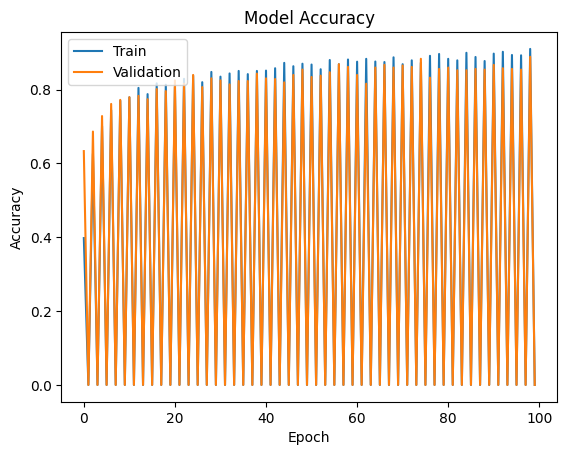

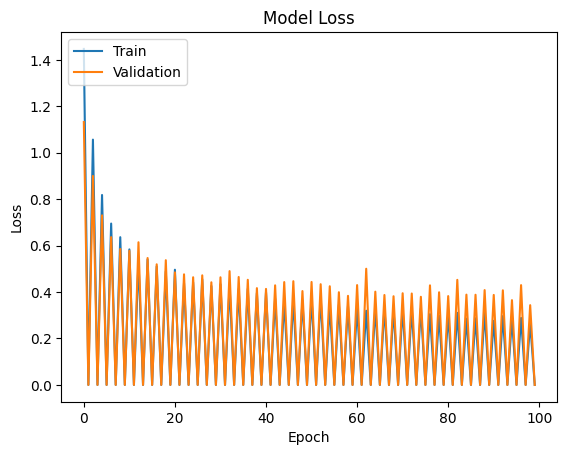

In [2]:
log_dir = "logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

callbacks_list = [tensorboard_callback]

n_epochs = 100
batch_size = 64

model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

checkpoint = ModelCheckpoint('models/best_weights.keras', monitor='val_loss', save_best_only=True, mode='auto')

callbacks_list.append(checkpoint)

history = model.fit(x=train_generator, 
                    steps_per_epoch=len(train_generator), 
                    epochs=n_epochs,
                    validation_data=validation_generator,
                    validation_steps=len(validation_generator),
                    callbacks=callbacks_list)

# Lưu mô hình
model.save('models/model.h5')

# Vẽ biểu đồ accuracy của model train và model validation
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Vẽ biểu đồ loss của model train và model validation
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()